In [ ]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np 
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
files.upload()

Saving data.csv to data (1).csv


{'data.csv': b'\xef\xbb\xbfTweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,,,\r\n1347269321148542976,Elon Musk is now the richest person in the world https://t.co/DVbdra0f43,AllotteTV,AllotteTV,2021-01-07T19:50:11.000Z,Thu Jan 07 19:50:11 +0000 2021,0,0,en,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",Tweet,https://www.allottetv.com/2021/01/elon-musk-is-now-richest-person-in-world.html ,0,0,,,,,\r\n1347269320380968962,"RT @business : Elon Musk, the outspoken entrepreneur behind Tesla and SpaceX, is now the richest person on the planet https://t.co/Z5Nu1kuWx2",Oops. I. Won.,oopsiwon,2021-01-07T19:50:11.000Z,Thu Jan 07 19:50:11 +0000 2021,0,0,en,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Retweet,https://trib.al/s0b1ERB ,0,0,,,,,\r\n1347269317998628864,"Elon Musk becoming the richest person on the planet, as well as any othe

In [ ]:
df = pd.read_csv("data.csv")

In [ ]:
df1 = df[["Text" , "Tweet Type"]]

In [ ]:
df1

,Text,Tweet Type
0,Elon Musk is now the richest person in the wor...,Tweet
1,"RT @business : Elon Musk, the outspoken entrep...",Retweet
2,Elon Musk becoming the richest person on the p...,Tweet
3,"RT @Forbes : No, Elon Musk is not the richest ...",Retweet
4,RT @lexfridman : Elon Musk is now the richest ...,Retweet
...,...,...
2075,RT @disclosetv : JUST IN - Elon Musk just pass...,Retweet
2076,Elon Musk Reacts to News that He's the Richest...,Tweet
2077,RT @HotFreestyle : Elon Musk is now the riches...,Retweet
2078,RT @npuk1 : 700 years after Mansa Musa of Mali...,Retweet


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet=WordNetLemmatizer()

In [ ]:
def cleanTxt(text):
    text = re.sub(r'[^\w\s]', '', text) 
    text=text.lower()
    
    text=re.sub(r'[0-9\.]+', '',text)
    # text=[wordnet.lemmatize(word)for word in text if word not in set(stopwords.words('english'))]
    # text=' '.join(text)
    return text

In [ ]:
df["Text"] = df["Text"].apply(cleanTxt)

In [ ]:
data = pd.DataFrame(df["Text"])
data

,Text
0,elon musk is now the richest person in the wor...
1,rt business elon musk the outspoken entrepren...
2,elon musk becoming the richest person on the p...
3,rt forbes no elon musk is not the richest per...
4,rt lexfridman elon musk is now the richest pe...
...,...
2075,rt disclosetv just in elon musk just passed ...
2076,elon musk reacts to news that hes the richest ...
2077,rt hotfreestyle elon musk is now the richest ...
2078,rt npuk years after mansa musa of mali reign...


In [ ]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 

#Create a function to get the Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity 


#Create two new column 

data["Subjectivity"] = data["Text"].apply(getSubjectivity)
data["Polarity"] = data["Text"].apply(getPolarity)

data.head(15)

,Text,Subjectivity,Polarity,Analysis
0,elon musk is now the richest person in the wor...,0.0000,0.0000,Neutral
1,rt business elon musk the outspoken entrepren...,0.7000,-0.4000,Negative
2,elon musk becoming the richest person on the p...,0.6125,0.1625,Positive
3,rt forbes no elon musk is not the richest per...,0.0000,0.0000,Neutral
4,rt lexfridman elon musk is now the richest pe...,0.6000,0.5000,Positive
5,rt investingcom tesla ceo elon musk is now th...,0.0000,0.0000,Neutral
6,httpstcoypvyxavql congrats mr elon,0.0000,0.0000,Neutral
7,rt zei_squirrel elon musk has just become the...,0.0000,0.0000,Neutral
8,rt newsfromorbit breaking elon musk has becom...,0.0500,0.1500,Positive
9,rt cnn elon musk has edged past amazon founde...,0.2500,-0.2500,Negative


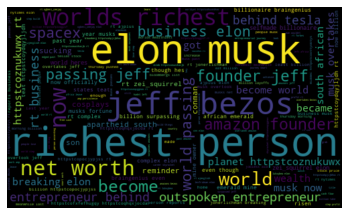

In [ ]:
allwords = ' '.join([words for words in data["Text"]])
wordCloud = WordCloud(width= 500, height=300, random_state=21, max_font_size = 119).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
data["Analysis"] = data["Polarity"].apply(analysis)
data.head()

,Text,Subjectivity,Polarity,Analysis
0,elon musk is now the richest person in the wor...,0.0000,0.0000,Neutral
1,rt business elon musk the outspoken entrepren...,0.7000,-0.4000,Negative
2,elon musk becoming the richest person on the p...,0.6125,0.1625,Positive
3,rt forbes no elon musk is not the richest per...,0.0000,0.0000,Neutral
4,rt lexfridman elon musk is now the richest pe...,0.6000,0.5000,Positive


In [ ]:
data["Analysis"].value_counts(normalize=True).to_frame().style.format('{:.6%}')

,Analysis
Positive,45.625000%
Neutral,33.461538%
Negative,20.913462%


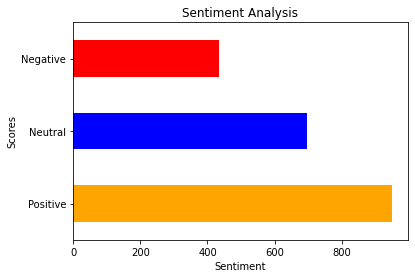

In [ ]:
plt.title("Sentiment Analysis")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
data["Analysis"].value_counts().plot(kind="barh", color=['orange', 'blue', 'red'])
plt.show()

In [ ]:
data.to_csv('sentiment.csv')

# New Section

In [ ]:

#Bag of Word Vectorization using Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
text_counts = cv.fit_transform(data['Text'])
#Splitting the data into trainig and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['Text'], test_size=0.25, random_state=5)
# #Training the model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
# #Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score: ",accuracy_score)
# print(text_counts)

Accuracuy Score:  0.7269230769230769


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
cv1=TfidfVectorizer()
text_counts = cv1.fit_transform(data['Text'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, data['Text'], test_size=0.25, random_state=5)
# #Training the model
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
# #Caluclating the accuracy score of the model
from sklearn import metrics
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score: ",accuracy_score)

Accuracuy Score:  0.7153846153846154
